<a href="https://colab.research.google.com/github/RA2112704010029/APPLIED-DEEP-LEARNING-/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("trainingdatapro/pose-estimation")

print("Path to dataset files:", path)

100%|██████████| 133M/133M [00:00<00:00, 157MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/trainingdatapro/pose-estimation/versions/4


In [ ]:
!pip install mediapipe kagglehub opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3


# LOAD THE DATASET

In [ ]:
import kagglehub
import cv2
import mediapipe as mp
import os
from google.colab.patches import cv2_imshow

# Download the dataset
path = "/root/.cache/kagglehub/datasets/trainingdatapro/pose-estimation/versions/4"
print("Path to dataset files:", path)

def detect_human_pose(image):
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose()
    mp_drawing = mp.solutions.drawing_utils

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    return image

def process_dataset_images(dataset_path):
    for file in os.listdir(dataset_path):
        if file.endswith(".jpg") or file.endswith(".png"):
            image_path = os.path.join(dataset_path, file)
            image = cv2.imread(image_path)

            if image is None:
                continue

            image_pose = detect_human_pose(image)
            cv2_imshow(image_pose)  # Display in Google Colab

# Update dataset path to the correct directory
dataset_path = path  # Use the correct downloaded path
process_dataset_images(dataset_path)

Path to dataset files: /root/.cache/kagglehub/datasets/trainingdatapro/pose-estimation/versions/4


In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 115.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        keras.Input(shape=(224, 224, 3)),  # Proper input layer definition
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(66)  # 33 keypoints * 2 (x, y)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 66)                  │           8,514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,915,906 (91.23 MB)

 Trainable params: 23,915,906 (91.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Example dummy data (assuming images are 224x224 RGB)
X = np.random.rand(100, 224, 224, 3)  # 100 sample images
y = np.random.rand(100, 66)           # 66 keypoints for each sample

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - loss: 30.7824 - mae: 3.2119 - val_loss: 0.6658 - val_mae: 0.6662
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.5055 - mae: 0.5804 - val_loss: 0.3236 - val_mae: 0.4815
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.3172 - mae: 0.4768 - val_loss: 0.3050 - val_mae: 0.4685
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - loss: 0.3052 - mae: 0.4660 - val_loss: 0.2932 - val_mae: 0.4574
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.2890 - mae: 0.4512 - val_loss: 0.2654 - val_mae: 0.4320
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.2596 - mae: 0.4238 - val_loss: 0.2345 - val_mae: 0.4009
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.2263 - mae: 0.3858 - val_loss: 0.2046 - val_mae: 0.3710
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.1935 - mae: 0.3541 - val_loss: 0.1782 - val_mae: 0.3465
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.1668 - mae: 0.3293 - val_loss: 0.1540

SAMPLE INPUT FILE

In [ ]:
from google.colab import files

# Upload the image file
uploaded = files.upload()

# Get the file name
image_path = list(uploaded.keys())[0]
print(f"Uploaded file: {image_path}")

Saving human-pose-estimation.jpg to human-pose-estimation.jpg
Uploaded file: human-pose-estimation.jpg


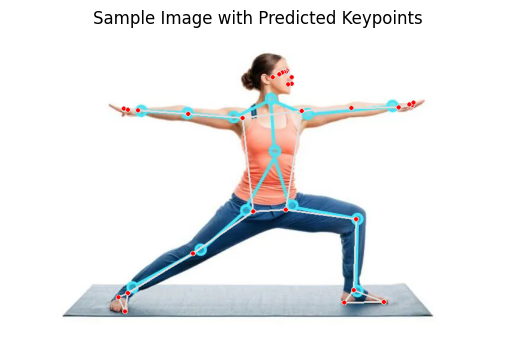

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# Load the sample image
image_path = "human-pose-estimation.jpg"
sample_image = cv2.imread(image_path)

# Check if the image was loaded successfully
if sample_image is None:
    raise ValueError(f"Failed to load the image from '{image_path}'. Ensure the file is a valid image.")

# Convert the image to RGB
image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Process the image to detect pose
results = pose.process(image_rgb)

# Draw the pose landmarks on the image
if results.pose_landmarks:
    mp_drawing.draw_landmarks(sample_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Convert the image from BGR to RGB for displaying with matplotlib
output_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display the image with predicted keypoints
plt.imshow(output_image)
plt.title("Sample Image with Predicted Keypoints")
plt.axis('off')
plt.show()

In [ ]:
# Upload ipynb file
from google.colab import files
import subprocess
import os

# Upload the file
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Ensure nbconvert is installed
subprocess.run(["pip", "install", "nbconvert"])

# Convert the notebook to HTML
subprocess.run(["jupyter", "nbconvert", file_name, "--to", "html"])

# Define the HTML file name
html_file_name = file_name.replace(".ipynb", ".html")

# Check if the HTML file exists before downloading
if os.path.exists(html_file_name):
    files.download(html_file_name)
else:
    print(f"Error: {html_file_name} not found.")


Saving CV_RA2112704010029 (1).ipynb to CV_RA2112704010029 (1).ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>